# Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data
sources. These operations can involve anything from very straightforward concatena‐
tion of two different datasets, to more complicated database-style joins and merges
that correctly handle any overlaps between the datasets. Series and DataFrame s are
built with this type of operation in mind, and Pandas includes functions and methods
that make this sort of data wrangling fast and straightforward.

Here we’ll take a look at simple concatenation of Series and DataFrame s with the
pd.concat function; later we’ll dive into more sophisticated in-memory merges and
joins implemented in Panda

In [61]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [62]:
make_df("AB",[3,4])

,A,B
3,A3,B3
4,A4,B4


## Concatenation of NumPy Arrays

In [63]:
x = [1,2,3]
y = [4,5,6]
z = [7,8,9]

np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
x = [[1,2],[3,4]]
np.concatenate([x,x],axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with pd.concat

In [65]:
ser1 = pd.Series(["A","B","C"], index= [1,2,3])
ser2 = pd.Series(["D","E","F"], index= [4,5,6])
pd.concat([ser1,ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [66]:
# It also works to concatenate higher-dimensional objects, such as DataFrame s:
df1 = make_df("AB",[1,2])
df2 = make_df("AB",[3,4])
pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the DataFrame (i.e.,
axis=0 ). Like np.concatenate , pd.concat allows specification of an axis along which
concatenation will take place. Consider the following example:

In [67]:
df3 = make_df("AB", [0,1])
df4 = make_df("CD", [0,1])

pd.concat([df3,df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


### Duplicate indices

In [68]:
x = make_df("AB", [0,1])
y = make_df("AB", [2,3])

y.index = x.index 
pd.concat([x,y], axis=0)

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


### Ignoring the index.

In [69]:
pd.concat([x,y],ignore_index=True )

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3



### Adding MultiIndex keys

Another alternative is to use the keys option to specify a label
for the data sources; the result will be a hierarchically indexed series containing the
data:

In [70]:
pd.concat([x,y],keys=["x","y"])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

### Concatenation with joins

In [71]:
# . By default, the join is a union of the input columns ( join='outer' ),
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
pd.concat([df5,df6] )

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [72]:
# try join inner
pd.concat([df5,df6], join="inner")

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


### The append() method

In [73]:
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


## Combining Datasets: Merge and Join

### One-to-one joins

In [74]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [75]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


**Note** : The pd.merge() function recognizes that each DataFrame has an “employee” column,
and automatically joins using this column as a key. The result of the merge is a new
DataFrame that combines the information from the two inputs. Notice that the order
of entries in each column is not necessarily maintained: in this case, the order of the
“employee” column differs between df1 and df2 , and the pd.merge() function cor‐
rectly accounts for this. Additionally, keep in mind that the merge in general discards
the index, except in the special case of merges by index

### Many-to-one joins

In [76]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
df4, df3 

(         group supervisor
 0   Accounting      Carly
 1  Engineering      Guido
 2           HR      Steve,
   employee        group  hire_date
 0      Bob   Accounting       2008
 1     Jake  Engineering       2012
 2     Lisa  Engineering       2004
 3      Sue           HR       2014)

In [77]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


### Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well
defined. If the key column in both the left and right array contains duplicates, then
the result is a many-to-many merge. This will be perhaps most clear with a concrete
example. Consider the following, where we have a DataFrame showing one or more
skills associated with a particular group.

In [78]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
df4 , df5

(         group supervisor
 0   Accounting      Carly
 1  Engineering      Guido
 2           HR      Steve,
          group        skills
 0   Accounting          math
 1   Accounting  spreadsheets
 2  Engineering        coding
 3  Engineering         linux
 4           HR  spreadsheets
 5           HR  organization)

In [79]:
pd.merge(df4,df5)

,group,supervisor,skills
0,Accounting,Carly,math
1,Accounting,Carly,spreadsheets
2,Engineering,Guido,coding
3,Engineering,Guido,linux
4,HR,Steve,spreadsheets
5,HR,Steve,organization


In [80]:
df1, df5

(  employee        group
 0      Bob   Accounting
 1     Jake  Engineering
 2     Lisa  Engineering
 3      Sue           HR,
          group        skills
 0   Accounting          math
 1   Accounting  spreadsheets
 2  Engineering        coding
 3  Engineering         linux
 4           HR  spreadsheets
 5           HR  organization)

In [81]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


## Specification of the Merge Key

### The on keyword

In [82]:
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [83]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### The left_on and right_on keywords

In [84]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [85]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop("name", axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The left_index and right_index keywords

In [86]:
df1a = df1.set_index("employee")
df2a = df2.set_index("employee")

df1a, df2a

(                group
 employee             
 Bob        Accounting
 Jake      Engineering
 Lisa      Engineering
 Sue                HR,
           hire_date
 employee           
 Lisa           2004
 Bob            2008
 Jake           2012
 Sue            2014)

In [87]:
pd.merge(df1a, df2a, left_index=True, right_index=True)


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


For convenience, DataFrame s implement the join() method, which performs a
merge that defaults to joining on indices:

In [88]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


If you’d like to mix indices and columns, you can combine left_index with right_on
or left_on with right_index to get the desired behavior:

In [89]:
df1a, df3

(                group
 employee             
 Bob        Accounting
 Jake      Engineering
 Lisa      Engineering
 Sue                HR,
    name  salary
 0   Bob   70000
 1  Jake   80000
 2  Lisa  120000
 3   Sue   90000)

In [90]:
pd.merge(df1a, df3, left_index=True, right_on="name")

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


## Specifying Set Arithmetic for Joins

In [91]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])

df6, df7

(    name   food
 0  Peter   fish
 1   Paul  beans
 2   Mary  bread,
      name drink
 0    Mary  wine
 1  Joseph  beer)

In [92]:
# how = inner
pd.merge(df6, df7, how="inner")

,name,food,drink
0,Mary,bread,wine


In [93]:
# how = outer
pd.merge(df6,df7, how="outer")

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [94]:
# how = left 
pd.merge(df6,df7, how="left")

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [95]:
# how = right
pd.merge(df6, df7, how="right")

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Overlapping Column Names: The suffixes Keyword

In [96]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})

df8, df9

(   name  rank
 0   Bob     1
 1  Jake     2
 2  Lisa     3
 3   Sue     4,
    name  rank
 0   Bob     3
 1  Jake     1
 2  Lisa     4
 3   Sue     2)

In [97]:
pd.merge(df8, df9, on="name", suffixes=("__L", "__R"))

,name,rank__L,rank__R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Example: US States Data

In [98]:
pop = pd.read_csv("../data/us-states/state-population.csv")
area = pd.read_csv("../data/us-states/state-areas.csv")
abbrevs = pd.read_csv("../data/us-states/state-abbrevs.csv")

In [99]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [100]:
area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [101]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [102]:
merged = pd.merge(pop, abbrevs, how="outer", left_on="state/region", right_on="abbreviation").drop("abbreviation",axis=1)
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


In [103]:
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           96
dtype: int64

In [104]:
merged = merged[merged["state/region"] != "USA"]

In [105]:
merged.loc[merged["population"].isnull(), "state/region"].unique()

array(['PR'], dtype=object)

In [106]:
merged.loc[merged["state/region"] == "PR", "state"] = "Puerto Rico"
merged

/home/mvt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2491,PR,under18,2010,896945.0,Puerto Rico
2492,PR,under18,2011,869327.0,Puerto Rico
2493,PR,total,2011,3686580.0,Puerto Rico
2494,PR,under18,2012,841740.0,Puerto Rico


In [107]:
final = pd.merge(merged, area, how="outer", on="state")
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423
...,...,...,...,...,...,...
2491,PR,under18,2010,896945.0,Puerto Rico,3515
2492,PR,under18,2011,869327.0,Puerto Rico,3515
2493,PR,total,2011,3686580.0,Puerto Rico,3515
2494,PR,under18,2012,841740.0,Puerto Rico,3515


In [108]:
final.isnull().sum()

state/region      0
ages              0
year              0
population       20
state             0
area (sq. mi)     0
dtype: int64

In [109]:
# final["state"][final["area (sq. mi)"].isnull()].unique() 
final.loc[final["area (sq. mi)"].isnull(), "state"].unique()

array([], dtype=object)

In [110]:
# sort data by date
data = final.sort_values(by="year")
data

,state/region,ages,year,population,state,area (sq. mi)
2064,TX,under18,1990,4906220.0,Texas,268601
1105,MN,total,1990,4389857.0,Minnesota,86943
721,IA,total,1990,2781018.0,Iowa,56276
720,IA,under18,1990,719366.0,Iowa,56276
719,IN,total,1990,5557798.0,Indiana,36420
...,...,...,...,...,...,...
873,LA,under18,2013,1112957.0,Louisiana,51843
950,ME,under18,2013,261276.0,Maine,35387
953,ME,total,2013,1328302.0,Maine,35387
2007,SD,total,2013,844877.0,South Dakota,77121


In [111]:
# get data in 2012
data2012 = data[data["year"]==2012]
data2012

,state/region,ages,year,population,state,area (sq. mi)
2399,WI,total,2012,5724554.0,Wisconsin,65503
2304,WV,total,2012,1856680.0,West Virginia,24231
2303,WA,total,2012,6895318.0,Washington,71303
2302,WA,under18,2012,1588451.0,Washington,71303
2400,WY,total,2012,576626.0,Wyoming,97818
...,...,...,...,...,...,...
1918,RI,under18,2012,216591.0,Rhode Island,1545
1633,ND,under18,2012,156765.0,North Dakota,70704
1630,NC,under18,2012,2284122.0,North Carolina,53821
1631,NC,total,2012,9748364.0,North Carolina,53821


In [112]:
total_pop_2012 = data2012.groupby(["state"])["population"].sum()
mean_areas = data2012.groupby(["state"])["area (sq. mi)"].mean()
states = data2012["state"].unique()

state_density_2012 = pd.DataFrame({"pop" : total_pop_2012, "area (sq. mi)" : mean_areas}, index=states)

state_density_2012["density"] = state_density_2012["pop"] / state_density_2012["area (sq. mi)"]

state_density_2012


,pop,area (sq. mi),density
Wisconsin,7040667.0,65503,107.486176
West Virginia,2240710.0,24231,92.472865
Washington,8483769.0,71303,118.981936
Wyoming,713152.0,97818,7.290601
Alabama,5935017.0,52423,113.213990
Missouri,7429537.0,69709,106.579308
Minnesota,6657696.0,86943,76.575411
Kansas,3612066.0,82282,43.898617
Kentucky,5397080.0,40411,133.554725
Louisiana,5716754.0,51843,110.270509


Text(0, 0.5, 'Population')

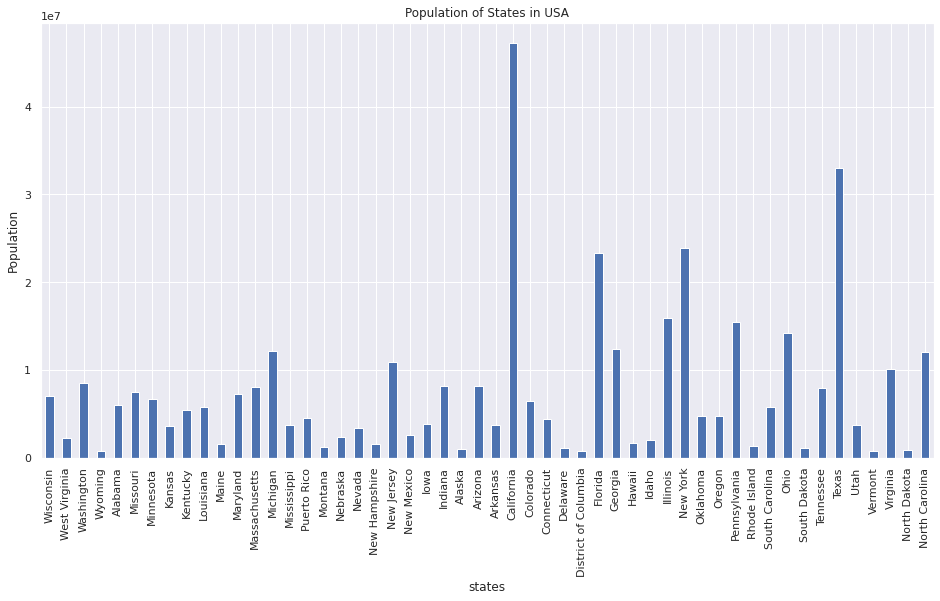

In [113]:
state_density_2012["pop"].plot(kind="bar", figsize=(16,8))
plt.title("Population of States in USA")
plt.xlabel("states")
plt.ylabel("Population")
